# App user segmentation is the task of grouping users based on how they engage with app. It helps find retained users, find the
# user segment for a maketing campaign, and solve many other business

In [23]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv('userbehaviour.csv')

In [27]:
df.head(2)

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17,634,1,9,7,2990,Installed
1,1002,0,54,0,4,8,24008,Uninstalled


In [29]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
pio.templates.default = "plotly_white"

# Let's start by looking at the highest, lowest, and average screen time of all the users:

In [32]:
print(f'Average Screen Time = {df["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {df["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {df["Average Screen Time"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50
Lowest Screen Time = 0


# Now let's have a look at the highest, lowest, and the average amount spent by all the users:

In [35]:
print(f'Average Spend of the Users = {df["Average Spent on App (INR)"].mean()}')
print(f'Highest Spend of the Users = {df["Average Spent on App (INR)"].max()}')
print(f'Lowest Spend of the Users = {df["Average Spent on App (INR)"].min()}')

Average Spend of the Users = 424.4154154154154
Highest Spend of the Users = 998
Lowest Spend of the Users = 0


# Now let's have a look at the relationship between the spending capacity and screen time of the active users and the users who have uninstalled the app:

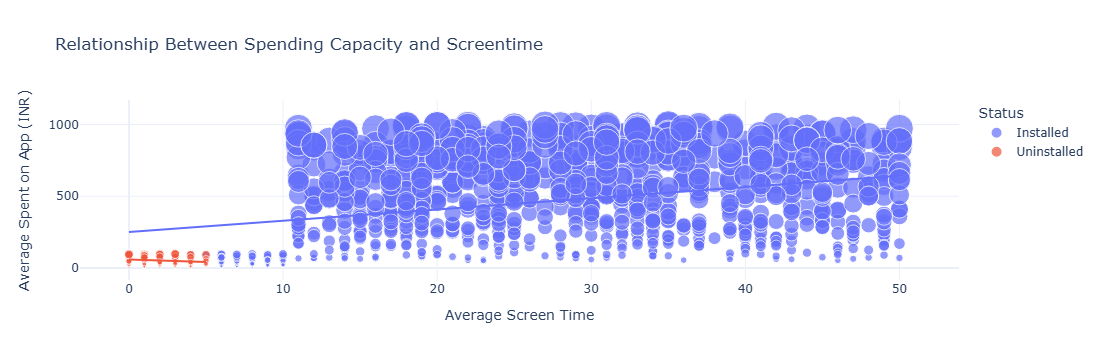

In [42]:
figure = px.scatter(data_frame = df,
                  x="Average Screen Time",
                  y="Average Spent on App (INR)",
                  size="Average Spent on App (INR)",
                  color= "Status",
                  title = "Relationship Between Spending Capacity and Screentime",
                  trendline="ols")

figure.show()

# So this is great! Users who uninstalled the app had an average screen time of fewer than 5 minutes a day, and the average spent was less than 100. We can also see a linear relationship between the average screen time and the average spending of the users still using the app.
# Now let's have a look at the relationship between the ratings given by users and the average screen time:

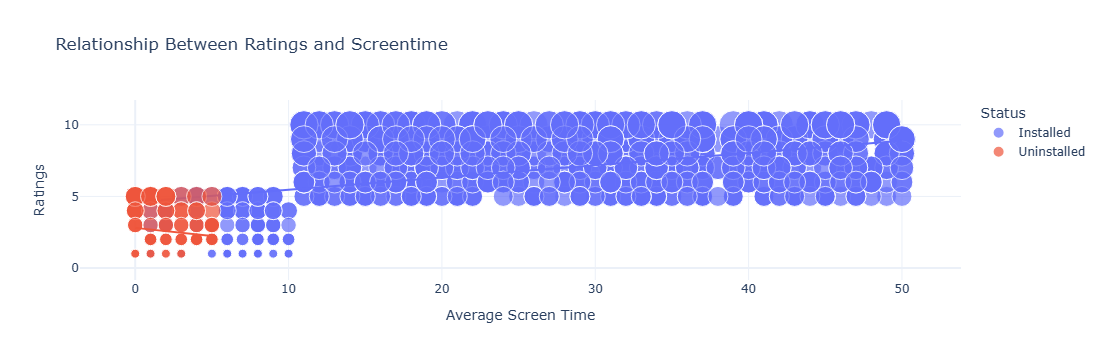

In [47]:
figure = px.scatter(data_frame = df,
                    x="Average Screen Time",
                    y="Ratings",
                    size="Ratings",
                    color= "Status",
                    title= "Relationship Between Ratings and Screentime",
                    trendline = "ols")

figure.show()

# App User Segmentation to Find Retained and Lost Users

In [57]:
clustering_data = df[["Average Screen Time", "Left Review",
                      "Ratings", "Last Visited Minutes", "Average Spent on App (INR)",
                      "New Password Request"]]

In [65]:
from sklearn.preprocessing import MinMaxScaler
for i in clustering_data.columns:
    MinMaxScaler(i)
    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(clustering_data)
df["Segments"] = clusters

print(df.head(10))

   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                   17                         634            1   
1    1002                    0                          54            0   
2    1003                   37                         207            0   
3    1004                   32                         445            1   
4    1005                   45                         427            1   
5    1006                   28                         599            0   
6    1007                   49                         887            1   
7    1008                    8                          31            0   
8    1009                   28                         741            1   
9    1010                   28                         524            1   

   Ratings  New Password Request  Last Visited Minutes       Status  Segments  
0        9                     7                  2990    Installed         0  
1        4    

In [67]:
print(df["Segments"].value_counts())

Segments
0    910
1     45
2     44
Name: count, dtype: int64


# Now let's rename the segments for a better understanding:

In [70]:
df["Segments"] = df["Segments"].map({0: "Retained", 1: 
                                     "Churn", 2: "Needs Attention"})

In [74]:
df.head(2)

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17,634,1,9,7,2990,Installed,Retained
1,1002,0,54,0,4,8,24008,Uninstalled,Needs Attention


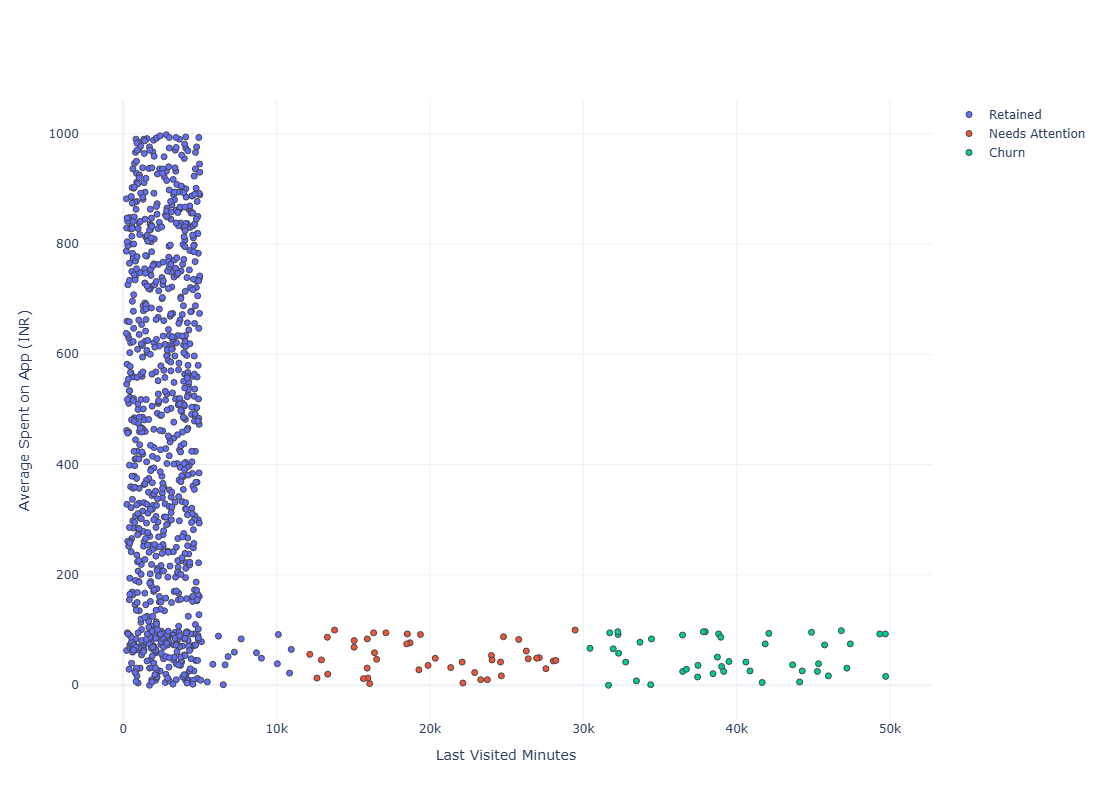

In [86]:
PLOT = go.Figure()
for i in list(df["Segments"].unique()):
    PLOT.add_trace(go.Scatter(x = df [df["Segments"]== i]['Last Visited Minutes'],
                              y = df [df["Segments"] == i] ['Average Spent on App (INR)'],
                              mode = 'markers', marker_size = 6, marker_line_width = 1,
                              name = str(i)))
    
PLOT.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}')

PLOT.update_layout(width=800, height = 800, autosize = True, showlegend = True,
                   yaxis_title = 'Average Spent on App (INR)',
                   xaxis_title= 'Last Visited Minutes',
                   scene= dict(xaxis=dict(title = 'Last Visited Minutes', title_font_color = 'black'),
                               yaxis =dict(title = 'Average Spent on App (INR)',
                                          title_font_color = 'black')))
    